## Replication for "Asymmetry by Design", October 22, 2020
### By Adam Goldstein and Charlie Eaton

### Table 8: Brand-Specific News Mentions after Law Enforcement Against Parent Firm

Install STATA packages

In [1]:
*ssc install estout

Download datasets

In [2]:
*

In [3]:
qui {
    quietly use data/d_unitidasymmetry, clear

quietly collapse (rawsum) sftesale sftetotl (mean) all_under system_under grad_rate_150_p_w ///
loan_amount_borrower_c_w tuitionall_c_w selective white_share_w black_share_w hisp_share_w ///
pell_grants_per_fte_c_w ft_faculty_per_100fte_w dpcttype_health dpcttype_law ///
dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz online ///
(first) state_n (min) iclevel (max) law_enf_frst_this_yr multi_brand, by(systemid year)
    
merge 1:m systemid year using data/d_brandnews, ///
keep(3) nogen keepusing(brandarticles incident_id systemnm inst_name_new name_first7)

label define multi_brand 0 "Two or fewer brands" 1 "More than 3 brands"
label values multi_brand multi_brand
}

In [4]:
quietly {
est clear
 eststo: nbreg brandarticles multi_brand system_under ///
online selective i.iclevel dpct* i.year state_n, cluster(incident) ro

label var brandarticles "# of articles"
label var multi_brand "multi-brand"
label var system_under "firm enrollment (1,000s)"
label var online "online"
label var selective "selective admissions"
    label drop iclevel
label define iclevel 1 "BA offered" 2 "AA offered" 
    label values iclevel iclevel
label var dpcttype_arts "% degr. art"
label var dpcttype_biz "% degr. biz"
label var dpcttype_culinarycosmetic "% degr. personal services"
label var dpcttype_health "% degr. health"
label var dpcttype_law "% degr. law (undergrad)"
label var dpcttype_tech "% degr. tech"
    
esttab using tables/t8_brandnewsmentions.rtf, replace order(multi_brand system_under online selective) ///
keep(multi_brand system_under online selective 1.iclevel 2.iclevel ///
dpcttype_law dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz _cons)  ///
se(%9.2fc) b(%9.2fc) nogaps eqlabels(none) ///
 star(* 0.05 ** 0.01 *** 0.001) varwidth(15) label ///
stats(r2_p N_clust N, fmt(2 %9.0fc %9.0fc) label("pseudo r2" "incident clusters" "N"))
}

In [5]:
table multi_brand, c(mean brandarticles)


------------------------------------
        multi-brand | mean(branda~s)
--------------------+---------------
Two or fewer brands |       30.91954
 More than 3 brands |      12.193717
------------------------------------


In [6]:
%html
esttab, html order(multi_brand system_under online selective 1.iclevel 2.iclevel) ///
keep(multi_brand system_under online selective 1.iclevel 2.iclevel ///
dpcttype_law dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz _cons)  ///
se(%9.2fc) b(%9.2fc) nogaps eqlabels(none) ///
 star(* 0.05 ** 0.01 *** 0.001) varwidth(15) label ///
stats(r2_p N_clust N, fmt(2 %9.0fc %9.0fc) label("pseudo r2" "incident clusters" "N"))

This front-end or document format cannot display HTML



  Variables that uniquely identify margins: multi_brand


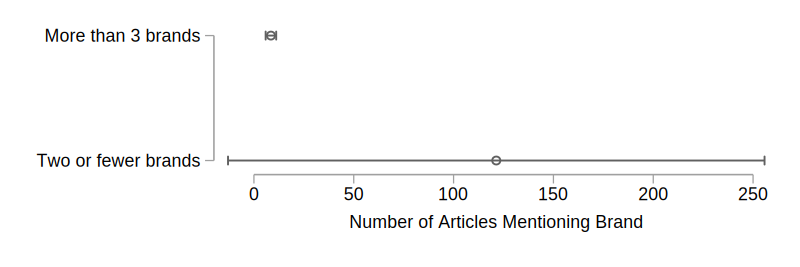

In [7]:
quietly {
    set scheme plotplain
qui eststo: nbreg brandarticles i.multi_brand system_under online selective i.iclevel dpct* i.year, cluster(incident) ro
margins i.multi_brand
marginsplot, horizontal unique recast(scatter) title("", margin(medsmall) yoffset(2) size(small)) ///
scale(2.4) xsize(4.5) ysize(1.5) ytitle("") xtitle("Number of Articles Mentioning Brand", size(small)) ///
name(news_content_analysis_brands, replace) graphregion(margin(large)) xlab(, nogrid) ylab(, nogrid) 
}